<a href="https://colab.research.google.com/github/DenisseRamirezC/iayaa-Equipo-42/blob/main/SVM_Equipo42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

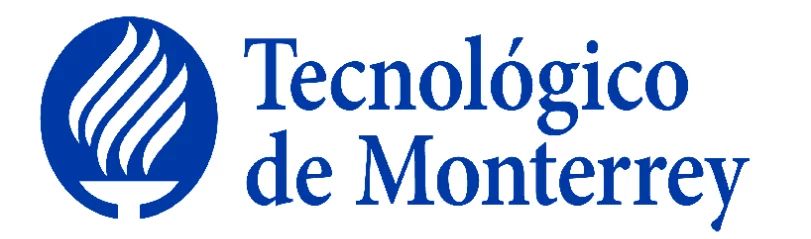


#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 8**
###**Máquina de Vector Soporte - Support Vector Machine(SVM)**


**Nombres y matrículas de los integrantes del equipo:**

*  Norma de los Ángeles García López A01228278
*  Ramón Ariel Iván Muñoz Corona A01330566
*  Denisse María Ramírez Colmenero A01561497
*  Ignacio Valdés Reyes  A01793262
*  Rigoberto Vega Escudero. A01793132 


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from google.colab import drive
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer

from sklearn.metrics import classification_report, make_scorer
from sklearn.compose import TransformedTargetRegressor
from sklearn.inspection import permutation_importance

from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

from sklearn import svm

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve

from sklearn import metrics
from sklearn.metrics import roc_curve
from numpy import argmax
from numpy import arange
from sklearn.metrics import roc_auc_score

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


#**Ejercicio-1.** 

1. Realiza una partición de los datos con 15% en el conjunto de prueba y el resto para entrenamiento y validación. Usa un random_state=0. 


In [ ]:
mypath = '/content/drive/MyDrive/Colab Notebooks/Inteligencia Artificial/Actividad 9/australian.dat'
data = pd.read_csv(mypath, sep=" ", header=None)
data.columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15']
print(data.shape)
data.head()

(690, 15)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [ ]:
#revision del dataset
np.inf

inf

In [ ]:
X , y =   data.drop('A15', axis='columns'), data['A15'] 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
#checamos la distribucion
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(690, 14)
(586, 14)
(104, 14)


In [ ]:
#checamos balanceo de las clases
print('Total de datos generados:', y_train.shape[0])
print('Total de datos en la clase positiva', y_train.sum())
print('Total de datos en la clase negativa', (y_train.shape[0] - y_train.sum()))

Total de datos generados: 586
Total de datos en la clase positiva 261
Total de datos en la clase negativa 325


#**Ejercicio-2.**

2. Hacer una análisis de los datos y llevar a cabo las transformaciones que consideres adecuadas. Utiliza un Pipeline para evitar el filtrado de información. 


In [ ]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [ ]:
#Definicion de variables
# categorical
categorica = ['A1','A4','A5','A6','A8','A9','A11','A12']
# discretized quantitative
ordinal = []
#quantitative
numerica = ['A2','A3','A7','A10','A13','A14']
# Binaria
binaria = []

print(len(categorica),len(ordinal),len(numerica),len(binaria))

8 0 6 0


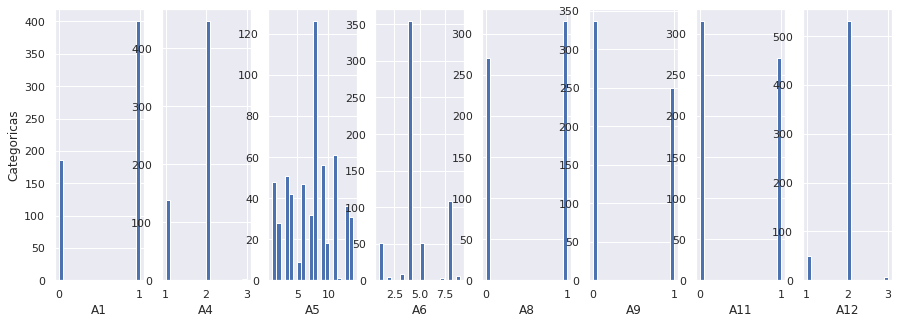

In [ ]:
#Categorica
sns.set(rc={'figure.figsize':(15,5)})
fig, axes = plt.subplots(1, 8)   
for k in range(0,8):  
  plt.subplot(1,8,k+1) 

  Transf0 = X_train[categorica].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.hist(Transf0, bins=20) 
  plt.xlabel(categorica[k])
  if k==0:
    plt.ylabel('Categoricas')



In [ ]:
X_train_nor = X_train[numerica].copy()
scaler = MinMaxScaler(feature_range=(1,2))
scaler.fit(X_train_nor)
X_Train_NOM = scaler.transform(X_train_nor)
X_Train_NOM = pd.DataFrame(X_Train_NOM,dtype = 'float')
X_Train_NOM.columns = numerica
X_Train_NOM

,A2,A3,A7,A10,A13,A14
0,1.537594,1.270893,1.266140,1.223881,1.0000,1.05000
1,1.093985,1.044643,1.004386,1.000000,1.0700,1.00004
2,1.207970,1.072857,1.070175,1.044776,1.1850,1.00560
3,1.147820,1.016429,1.092105,1.089552,1.1040,1.00347
4,1.211729,1.053571,1.070175,1.164179,1.2170,1.00035
...,...,...,...,...,...,...
581,1.171729,1.107143,1.043860,1.014925,1.0000,1.00022
582,1.223008,1.126429,1.017544,1.000000,1.0855,1.00000
583,1.165414,1.019286,1.035088,1.000000,1.0600,1.00001
584,1.510075,1.010357,1.526316,1.298507,1.0000,1.15000


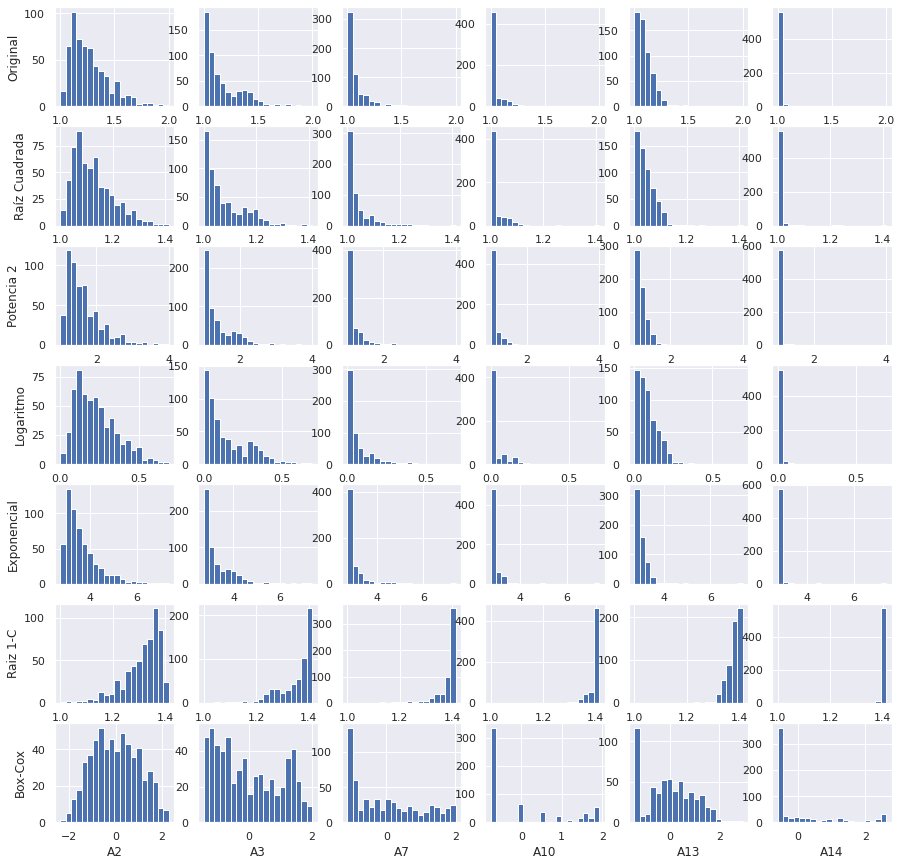

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})
#Numerica
k=0
fig, axes = plt.subplots(7, 6)   
for k in range(0,6):  
  plt.subplot(7,6,k+1) 

  Transf0 = X_Train_NOM[numerica].iloc[:,k].to_numpy().reshape(-1, 1)  
  plt.hist(Transf0, bins=20) 
  plt.xlabel(numerica[k])
  if k==0:
    plt.ylabel('Original')
  
  plt.subplot(7,6,k+7)    
  Transf1 = np.sqrt(Transf0)       
  plt.hist(Transf1, bins=20)                      
  plt.xlabel(numerica[k])
  if k==0:
    plt.ylabel('Raíz Cuadrada')

  plt.subplot(7,6,k+13)    
  Transf2 = np.power(Transf0,2)       
  plt.hist(Transf2, bins=20)                      
  plt.xlabel(numerica[k])
  if k==0:
    plt.ylabel('Potencia 2')

  plt.subplot(7,6,k+19)    
  Transf3 = np.log(Transf0)
  plt.hist(Transf3, bins=20)       
  plt.xlabel(numerica[k])
  if k==0:
    plt.ylabel('Logaritmo')

  plt.subplot(7,6,k+25)    
  Transf4 = np.exp(Transf0)
  plt.hist(Transf4, bins=20)       
  plt.xlabel(numerica[k])
  if k==0:
    plt.ylabel('Exponencial')

  plt.subplot(7,6,k+31)    
  Transf5 = np.sqrt((Transf0.max()+1)-Transf0)
  plt.hist(Transf5, bins=20)       
  plt.xlabel(numerica[k])
  if k==0:
    plt.ylabel('Raiz 1-C')
  
  plt.subplot(7,6,k+37)
  Transf6 = power_transform(X_Train_NOM.iloc[:,k].to_numpy().reshape(-1, 1), method='box-cox')        
  plt.hist(Transf6, bins=20)                    
  plt.xlabel(numerica[k])
  if k==0:
   plt.ylabel('Box-Cox')

plt.show()

In [ ]:
def SqrtMax (X):
  X_=X.copy()
  X_=np.sqrt((X_.max()+1)-X_)
  return(X_)

In [ ]:
#Pipelines                                                     
num_prepro_pipeline = Pipeline(steps = [('impMedian', SimpleImputer(strategy='median')),  
                                        ('scalar', MinMaxScaler(feature_range=(1,2))) ,
                                         ('trans', FunctionTransformer(np.log))])  
num_pipeline_nombres = numerica

#######################################################################################################  
Cat_prepro_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                                        ('OneHotE', OneHotEncoder(handle_unknown='ignore'))])
 
Cat_pipeline_nombres = categorica

#######################################################################################################   
columnasTransformer = ColumnTransformer(transformers = [('numerical', num_prepro_pipeline, num_pipeline_nombres),
                                        ('categoricaimp1', Cat_prepro_pipeline, Cat_pipeline_nombres),
                                        ],  remainder='passthrough')
#######################################################################################################  


#**Ejercicio-3.**

3. Utiliza la función Dummy para modelos de clasificación con la estrategia “stratified” con el conjunto que tienes de datos de entrenamiento y validación. Obtener los valores de partida (baseline) de las siguientes métricas: accuracy, f1-score, precision y recall. ¿Por qué consideras que es adecuado usar la estrategia “stratified” en este caso? 

In [ ]:
#Funciones de las metricas
#Funcion Accuracy
def mi_accuracy(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  vn, fp, fn, vp = cm[0,0], cm[0,1], cm[1,0], cm[1,1] 
  
  return (vp+vn)/(vp+vn+fp+fn)

#Funcion Precision
def mi_precision(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  vn, fp, fn, vp = cm[0,0], cm[0,1], cm[1,0], cm[1,1] 
  result = (vp)/(vp+fp+np.finfo(np.float32).eps)
  
  
  return result

#Funcion recall
def mi_recall(yreal, ypred):

  cm = confusion_matrix(yreal, ypred)
  vn, fp, fn, vp = cm[0,0], cm[0,1], cm[1,0], cm[1,1] 
  
  return (vp)/(vp+fn)

#Funcin G-Mean
def mi_gmean(yreal, ypred):

    cm = confusion_matrix(yreal, ypred)
    vn, fp, fn, vp = cm[0,0], cm[0,1], cm[1,0], cm[1,1] 
    recall = vp / (vp+fn)
    especificidad = vn / (vn+fp)
    gmean = np.sqrt(recall * especificidad)

    return gmean

#Funcion f1-score
def mi_f1score(yreal, ypred):

    cm = confusion_matrix(yreal, ypred)
    vn, fp, fn, vp = cm[0,0], cm[0,1], cm[1,0], cm[1,1] 
    
    return (2*vp)/((2*vp)+fp+fn)


Me_Accuracy = make_scorer(mi_accuracy)
Me_Precision = make_scorer(mi_precision)
Me_Recall = make_scorer(mi_recall)
Me_F1Score = make_scorer(mi_f1score)
Me_Gmean = make_scorer(mi_gmean)

mismetricas = {"Accuracy":Me_Accuracy,"Precision":Me_Precision,"Recall":Me_Recall,"F1Score":Me_F1Score}

In [ ]:

#Dummy function

dummy_regr = DummyClassifier(strategy="stratified")
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',dummy_regr)])



pipeline.fit(X_train, y_train) 



y_test_hat = pipeline.predict(X_test)
y_train_hat = pipeline.predict(X_train)

print("Validacion\n")
print("Accuracy with dummy Regression: {:.2f}".format(mi_accuracy(y_test, y_test_hat)))
print("F1-Score with dummy Regression: {:.2f}".format(mi_f1score(y_test,y_test_hat)))
print("Precision with dummy Regression: {:.2f}".format(mi_precision(y_test,y_test_hat)))
print("Recall with dummy Regression: {:.2f}".format(mi_recall(y_test,y_test_hat)))
print("\nEntrenamiento\n")
print("Accuracy with dummy Regression: {:.2f}".format(mi_accuracy(y_train, y_train_hat)))
print("F1-Scorewith dummy Regression: {:.2f}".format(mi_f1score(y_train,y_train_hat)))
print("Precision with dummy Regression: {:.2f}".format(mi_precision(y_train,y_train_hat)))
print("Recall with dummy Regression: {:.2f}".format(mi_recall(y_train,y_train_hat)))

Validacion

Accuracy with dummy Regression: 0.55
F1-Score with dummy Regression: 0.46
Precision with dummy Regression: 0.49
Recall with dummy Regression: 0.43

Entrenamiento

Accuracy with dummy Regression: 0.53
F1-Scorewith dummy Regression: 0.47
Precision with dummy Regression: 0.47
Recall with dummy Regression: 0.48


¿Por qué consideras que es adecuado usar la estrategia “stratified” en este caso? 

El muestreo estratificado es un tipo de método de muestreo en el que la población total se divide en grupos o estratos más pequeños para completar el proceso de muestreo. Los estratos se forman en base a algunas características comunes en los datos de población. Después de dividir la población en estratos, el investigador selecciona aleatoriamente la muestra de manera proporcional. Por ellos podemos darle un mejor entrenamiento al modelo al tener esta población de datos mas distribuida en pequeños grupos.

#**Ejercicio-4.**

4. Usando el modelo de máquina de vector soporte (SVM) encuentra sus mejores hiperparámetros con una búsqueda de malla y validación cruzada, desplegando los errores indicados en el ejercicio anterior. 


In [ ]:
for key, metric in mismetricas.items():
  print(metric)

make_scorer(mi_accuracy)
make_scorer(mi_precision)
make_scorer(mi_recall)
make_scorer(mi_f1score)


In [ ]:
modeloSVC = svm.SVC()
pipeline = Pipeline(steps=[('ct1',columnasTransformer),('modelo',modeloSVC)])

dicc_grid = [{'modelo__kernel':['poly', 'rbf', 'sigmoid', 'linear'],
             'modelo__C':[0.1,1.0,10,100],
             'modelo__degree':[2,3,4],
             'modelo__class_weight':['balanced', None],
             'modelo__gamma':[1,0.1,0.01]
                          }]

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
Parametros_best = {}
for key, metric in mismetricas.items():
  grid = GridSearchCV(estimator=pipeline, 
                    param_grid=dicc_grid,
                    cv=cv, 
                    scoring=metric)

  grid.fit(X_train, np.ravel(y_train))
  Parametros_best[metric] = grid.best_params_
  print('Metrica {0}: \n'.format(key))
  print('Mejor valor obtenido con la mejor combinación:', grid.best_score_)
  print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
  print('Métrica utilizada:', grid.scoring)
  print('\n')

Metrica Accuracy: 

Mejor valor obtenido con la mejor combinación: 0.872625428557632
Mejor combinación de valores encontrados de los hiperparámetros: {'modelo__C': 0.1, 'modelo__class_weight': None, 'modelo__degree': 3, 'modelo__gamma': 0.1, 'modelo__kernel': 'poly'}
Métrica utilizada: make_scorer(mi_accuracy)


Metrica Precision: 

Mejor valor obtenido con la mejor combinación: 0.912776040312396
Mejor combinación de valores encontrados de los hiperparámetros: {'modelo__C': 0.1, 'modelo__class_weight': 'balanced', 'modelo__degree': 2, 'modelo__gamma': 0.01, 'modelo__kernel': 'rbf'}
Métrica utilizada: make_scorer(mi_precision)


Metrica Recall: 

Mejor valor obtenido con la mejor combinación: 0.9732704402515722
Mejor combinación de valores encontrados de los hiperparámetros: {'modelo__C': 0.1, 'modelo__class_weight': 'balanced', 'modelo__degree': 2, 'modelo__gamma': 1, 'modelo__kernel': 'sigmoid'}
Métrica utilizada: make_scorer(mi_recall)


Metrica F1Score: 

Mejor valor obtenido con la

In [ ]:
Parametros_best

{make_scorer(mi_accuracy): {'modelo__C': 0.1,
  'modelo__class_weight': None,
  'modelo__degree': 3,
  'modelo__gamma': 0.1,
  'modelo__kernel': 'poly'},
 make_scorer(mi_precision): {'modelo__C': 0.1,
  'modelo__class_weight': 'balanced',
  'modelo__degree': 2,
  'modelo__gamma': 0.01,
  'modelo__kernel': 'rbf'},
 make_scorer(mi_recall): {'modelo__C': 0.1,
  'modelo__class_weight': 'balanced',
  'modelo__degree': 2,
  'modelo__gamma': 1,
  'modelo__kernel': 'sigmoid'},
 make_scorer(mi_f1score): {'modelo__C': 0.1,
  'modelo__class_weight': None,
  'modelo__degree': 3,
  'modelo__gamma': 0.1,
  'modelo__kernel': 'poly'}}

In [ ]:
for metric in Parametros_best.keys():
  model_SVC_best = svm.SVC(kernel=Parametros_best[metric]['modelo__kernel'],    
                  C=Parametros_best[metric]['modelo__C'],
                  degree = Parametros_best[metric]['modelo__degree'],
                  class_weight=Parametros_best[metric]['modelo__class_weight'],
                  gamma=Parametros_best[metric]['modelo__gamma'],
                  probability=True
                  )       


  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',model_SVC_best)])

  pipeline.fit(X_train, y_train) 

  yhat_test = pipeline.predict(X_test) 
  yhat_train = pipeline.predict(X_train) 
 



  print("El valor de {0} para prueba es: {1:.3f}".format(metric,mi_f1score(y_test,yhat_test)))
  print("El valor de {0} para entrenamiento es: {1:.3f}".format(metric,mi_f1score(y_train,yhat_train)), '\n')



El valor de make_scorer(mi_accuracy) para prueba es: 0.841
El valor de make_scorer(mi_accuracy) para entrenamiento es: 0.867 

El valor de make_scorer(mi_precision) para prueba es: 0.808
El valor de make_scorer(mi_precision) para entrenamiento es: 0.824 

El valor de make_scorer(mi_recall) para prueba es: 0.672
El valor de make_scorer(mi_recall) para entrenamiento es: 0.666 

El valor de make_scorer(mi_f1score) para prueba es: 0.841
El valor de make_scorer(mi_f1score) para entrenamiento es: 0.867 



#**Ejercicio-5.**

5. Obtener además los diagramas de caja y bigote del mejor modelo con todas las métricas calculadas. Incluye tus conclusiones. 


In [ ]:
resultados = dict() 
Metrica = ['Accuracy','Precision','Recall','F1-Score']
k=0
for metric in Parametros_best.keys():
  model_SVC_best = svm.SVC(kernel=Parametros_best[metric]['modelo__kernel'],    
                  C=Parametros_best[metric]['modelo__C'],
                  degree = Parametros_best[metric]['modelo__degree'],
                  class_weight=Parametros_best[metric]['modelo__class_weight'],
                  gamma=Parametros_best[metric]['modelo__gamma'],
                  probability=True
                  )       

  
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',model_SVC_best)])

  pipeline.fit(X_train, y_train) 
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

  scores = cross_validate(pipeline, X_train, np.ravel(y_train), scoring=metric, cv=cv, return_train_score=True)
  resultados[metric] = scores
  
  print("Metrica a utilizar", Metrica[k], ": \n")
  print("Mean Train: {0:.3} ({1:.4}) \nmean Test: {2:.3} ({3:.4})\n".format(np.mean(resultados[metric]['train_score']),
                                                                                    np.std(resultados[metric]['train_score']),
                                                                                    np.mean(resultados[metric]['test_score']),
                                                                                    np.std(resultados[metric]['test_score']),
                                                                                    ))  
  k += 1

Metrica a utilizar Accuracy : 

Mean Train: 0.879 (0.006216) 
mean Test: 0.871 (0.02143)

Metrica a utilizar Precision : 

Mean Train: 0.912 (0.009198) 
mean Test: 0.915 (0.04047)

Metrica a utilizar Recall : 

Mean Train: 0.972 (0.006809) 
mean Test: 0.973 (0.02289)

Metrica a utilizar F1-Score : 

Mean Train: 0.866 (0.007372) 
mean Test: 0.857 (0.02353)



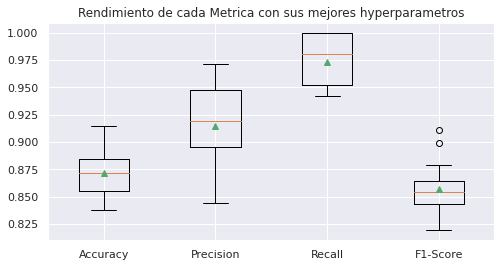

In [ ]:
#Bloxpot de los datos.
sns.set(rc={'figure.figsize':(8,4)})
nombres = ['Accuracy','Precision','Recall','F1-Score']
lista_metrica = ['test_Accuracy','test_Precision','test_Recall','test_F1Score']
bpGmean = list()
for i in resultados.keys():
  rr = resultados[i]['test_score']
  bpGmean.append(rr)
plt.title('Rendimiento de cada Metrica con sus mejores hyperparametros')
plt.boxplot(bpGmean, labels = nombres, showmeans=True)
plt.show()


###Conclusiones.

Al ver el desempeño de los modelos, podemos concluir que tenemos un buen desempeño del modelo optimizado para cada métrica, no parecen están subentrenados o sobreentrenados o al menos en su rendimiento no lo aparentan.

#**Ejercicio-6.**

6. Verifica que el modelo no esté subentrenado o sobreentrenado mediante alguna de las gráficas de curvas de entrenamiento (aumentando la complejidad o aumentando el conjunto de entrenamiento, la que consideres más adecuada). De ser necesario, realiza los ajustes necesarios para evitar alguno de estos problemas. 


In [ ]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores, score_type):

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='darkblue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='darkblue')
    
    plt.plot(train_sizes, val_mean, color='darkgreen', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='darkgreen')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.grid()
    plt.ylabel(score_type)
    plt.legend(loc='lower left')
    plt.show()

In [ ]:
def mi_ModeloYCurvasSVC(Xin, Metric, MetricName):
      

    model_SVC_best = svm.SVC(kernel=Parametros_best[Metric]['modelo__kernel'],    
                  C=Parametros_best[Metric]['modelo__C'],
                  degree = Parametros_best[Metric]['modelo__degree'],
                  class_weight=Parametros_best[Metric]['modelo__class_weight'],
                  gamma=Parametros_best[Metric]['modelo__gamma'],
                  probability=True
                  )    


    pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',model_SVC_best)])


    mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=42)

       
    delta_train_sz = np.linspace(0.1, 1.0, num=40)

    tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline ,    
                                                        X = Xin,
                                                        y = y_train,
                                                        cv = mi_kfold,
                                                        train_sizes = delta_train_sz,
                                                        scoring = Metric,
                                                        random_state=42)
     
    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, MetricName)


Curvas de aprendizaje del modelo SVC con Acuracy:



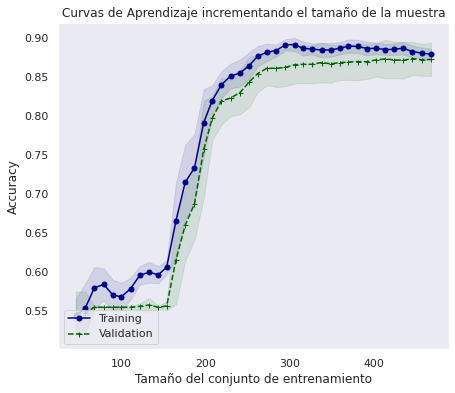



Curvas de aprendizaje del modelo SVC con Precision:



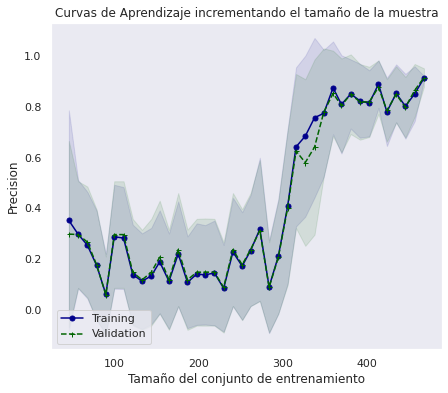



Curvas de aprendizaje del modelo SVC con Recall:



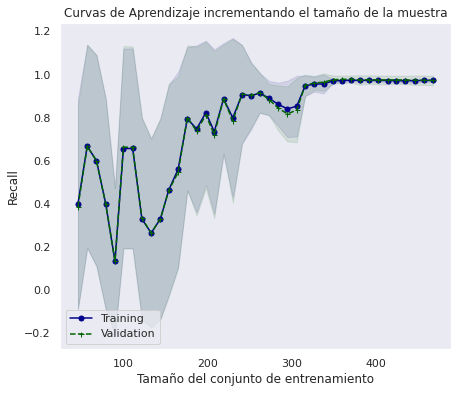



Curvas de aprendizaje del modelo SVC con F1-Score:



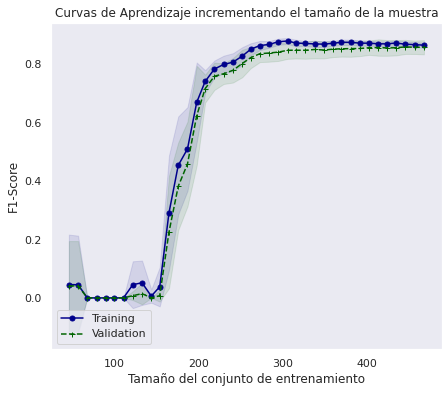

In [ ]:
print('Curvas de aprendizaje del modelo SVC con Acuracy:\n')
mi_ModeloYCurvasSVC(X_train, Me_Accuracy, 'Accuracy')
print('\n')

print('Curvas de aprendizaje del modelo SVC con Precision:\n')
mi_ModeloYCurvasSVC(X_train, Me_Precision, 'Precision')
print('\n')

print('Curvas de aprendizaje del modelo SVC con Recall:\n')
mi_ModeloYCurvasSVC(X_train, Me_Recall, 'Recall')
print('\n')

print('Curvas de aprendizaje del modelo SVC con F1-Score:\n')
mi_ModeloYCurvasSVC(X_train, Me_F1Score, 'F1-Score')
print('\n')

#**Ejercicio-7.**

7. Con los mejores hiperparámetros entontrados encontrar la gráfica de la curva ROC y su área bajo la curva. 

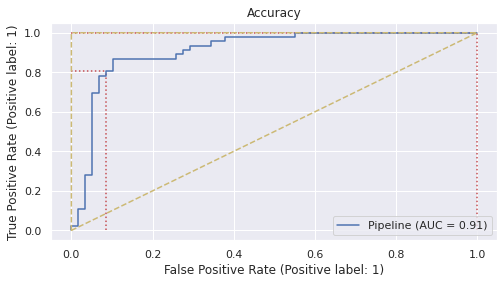

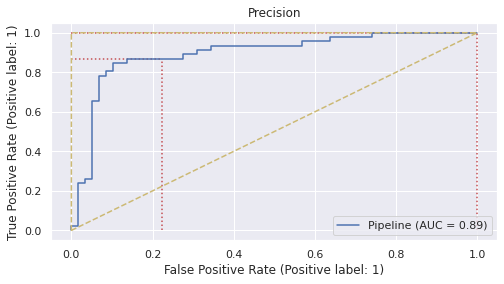

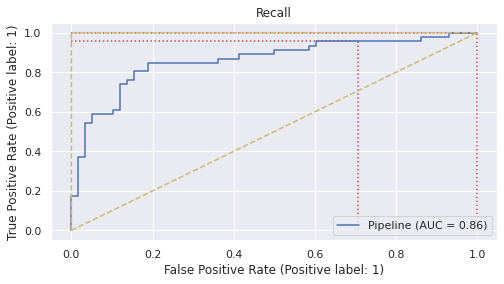

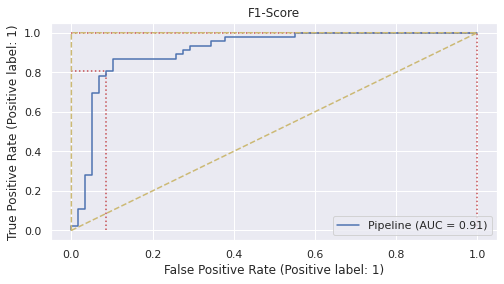

In [ ]:
nombres = ['Accuracy','Precision','Recall','F1-Score']
k = 0
for metric in Parametros_best.keys():
  model_SVC_best = svm.SVC(kernel=Parametros_best[metric]['modelo__kernel'],    
                  C=Parametros_best[metric]['modelo__C'],
                  degree = Parametros_best[metric]['modelo__degree'],
                  class_weight=Parametros_best[metric]['modelo__class_weight'],
                  gamma=Parametros_best[metric]['modelo__gamma'],
                  probability=True
                  )  
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',model_SVC_best)])

  pipeline.fit(X_train, y_train) 

  yhat_test = pipeline.predict(X_test) 

# Obtenemos la tasa de falsos positivos (fpr) y la tasa de verdaderos positivos (tpr):
  fpr, tpr, _ = metrics.roc_curve(y_test, yhat_test)

  metrics.RocCurveDisplay.from_estimator(pipeline, X_test, y_test)

  plt.plot([0,0,1,0],[0,1,1,0], 'y--')
  plt.title(nombres[k])
  plt.hlines(tpr, 0, fpr, colors='r', linestyles='dotted')  # Se calcula TPrate y FPrate con base a threshold=0.5
  plt.vlines(fpr, 0, tpr, colors='r', linestyles='dotted')  # como valor predeteminado
 
  k += 1
plt.show() 

#**Ejercicio-8.**

8. Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica f1-score. 


In [ ]:
# regresa los TP para un umbral deseado:

def fun_thTPrate(th, modelo, x, y):   
  p = modelo.predict_proba(x)   # shape (231x2)
  my1s = (y['A15']==1) 
  pred1s  = p[my1s][:,1]
  return sum(pred1s > th) / sum(my1s)

In [ ]:
# Análogo ahora con los FP:

def fun_thFPrate(th, modelo, x, y):   
  p = modelo.predict_proba(x)
  my0s = (y['A15']==0) 
  pred0s  = p[my0s][:,1]
  return sum(pred0s>th) / sum(my0s)

In [ ]:
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

In [ ]:
model_SVC_best_F1 = svm.SVC(kernel=Parametros_best[Me_F1Score]['modelo__kernel'],    
                  C=Parametros_best[Me_F1Score]['modelo__C'],
                  degree = Parametros_best[Me_F1Score]['modelo__degree'],
                  class_weight=Parametros_best[Me_F1Score]['modelo__class_weight'],
                  gamma=Parametros_best[Me_F1Score]['modelo__gamma'],
                  probability=True
                  )  
print(model_SVC_best_F1)

SVC(C=0.1, gamma=0.1, kernel='poly', probability=True)


In [ ]:
model_SVC_best_F1 = svm.SVC(kernel=Parametros_best[Me_F1Score]['modelo__kernel'],    
                  C=Parametros_best[Me_F1Score]['modelo__C'],
                  degree = Parametros_best[Me_F1Score]['modelo__degree'],
                  class_weight=Parametros_best[Me_F1Score]['modelo__class_weight'],
                  gamma=Parametros_best[Me_F1Score]['modelo__gamma'],
                  probability=True
                  )   

pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',model_SVC_best_F1)])

pipeline.fit(X_train, y_train) 

new_th = 0.3
  
pred_pr = pipeline.predict_proba(X_test)  # obtenemos primero las predicciones en formato probabilístico de 0 a 1. Este es vector 2D.
pred_pr = pred_pr[:,1] 



pred_bin_newTh = pred_pr > new_th
pred_bin_05 = pipeline.predict(X_test) 

print('Casos donde FP y FN los consideramos igualmente costosos:\n')
print('Predicciones con el umbral predeterminado 0.5:')
cm05 = confusion_matrix(y_test, pred_bin_05)    # los renglones son los reales y las columnas las predicciones.
print(cm05)

print('\nPredicciones con un mejor umbral de %.2f:' % new_th)
cmTh = confusion_matrix(y_test, pred_bin_newTh)    
print(cmTh)

AOC_score = roc_auc_score(y_test, pred_bin_05)
print('\nModelo 1 AUC score:%.2f' % AOC_score )

fpr, tpr, thresholds = roc_curve(y_test, pred_pr)
# get the best threshold
# J = tpr - fpr
# ix = argmax(J)
# best_thresh = thresholds[ix]
# print('\nBest Threshold=%f' % (best_thresh))

thresholds = arange(0, 1, 0.001)
# evaluar cada threshold
scores = [mi_f1score(y_test, to_labels(pred_pr, t)) for t in thresholds]
# obtener el mejor threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))



Casos donde FP y FN los consideramos igualmente costosos:

Predicciones con el umbral predeterminado 0.5:
[[53  5]
 [ 9 37]]

Predicciones con un mejor umbral de 0.30:
[[52  6]
 [ 6 40]]

Modelo 1 AUC score:0.86
Threshold=0.179, F-Score=0.86957


#**Ejercicio-9.**

9. Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica gmean

In [ ]:
modeloSVC = svm.SVC()
pipeline = Pipeline(steps=[('ct1',columnasTransformer),('modelo',modeloSVC)])

dicc_grid = [{'modelo__kernel':['poly', 'rbf', 'sigmoid', 'linear'],
             'modelo__C':[0.1,1.0,10,100],
             'modelo__degree':[2,3,4],
             'modelo__class_weight':['balanced', None],
             'modelo__gamma':[1,0.1,0.01]
                          }]

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

grid = GridSearchCV(estimator=pipeline, 
                    param_grid=dicc_grid,
                    cv=cv,
                    scoring= Me_Gmean)

grid.fit(X_train, np.ravel(y_train))
  

print('Mejor valor obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor obtenido con la mejor combinación: 0.8705199103419624
Mejor combinación de valores encontrados de los hiperparámetros: {'modelo__C': 0.1, 'modelo__class_weight': None, 'modelo__degree': 3, 'modelo__gamma': 0.1, 'modelo__kernel': 'poly'}
Métrica utilizada: make_scorer(mi_gmean)


In [ ]:
model_SVC_best_Gmean = svm.SVC(kernel=grid.best_params_.get('modelo__kernel'),    
                C=grid.best_params_.get('modelo__C'),
                degree = grid.best_params_.get('modelo__degree'),
                class_weight=grid.best_params_.get('modelo__class_weight'),
                gamma=grid.best_params_.get('modelo__gamma'),
                probability=True
                )

pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',model_SVC_best_Gmean)])

pipeline.fit(X_train, y_train) 

new_th = 0.6
  
pred_pr = pipeline.predict_proba(X_test)  # obtenemos primero las predicciones en formato probabilístico de 0 a 1. Este es vector 2D.
pred_pr = pred_pr[:,1] 



pred_bin_newTh = pred_pr > new_th
pred_bin_05 = pipeline.predict(X_test) 

print('Casos donde FP y FN los consideramos igualmente costosos:\n')
print('Predicciones con el umbral predeterminado 0.5:')
cm05 = confusion_matrix(y_test, pred_bin_05)    # los renglones son los reales y las columnas las predicciones.
print(cm05)

print('\nPredicciones con un mejor umbral de %.2f:' % new_th)
cmTh = confusion_matrix(y_test, pred_bin_newTh)    
print(cmTh)

AOC_score = roc_auc_score(y_test, pred_bin_05)
print('\nModelo 1 AUC score:%.2f' % AOC_score )

fpr, tpr, thresholds = roc_curve(y_test, pred_pr)
# get the best threshold
# J = tpr - fpr
# ix = argmax(J)
# best_thresh = thresholds[ix]
# print('\nBest Threshold=%f' % (best_thresh))

thresholds = arange(0, 1, 0.001)
# evaluar cada threshold
scores = [mi_f1score(y_test, to_labels(pred_pr, t)) for t in thresholds]
# obtener el mejor threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Casos donde FP y FN los consideramos igualmente costosos:

Predicciones con el umbral predeterminado 0.5:
[[53  5]
 [ 9 37]]

Predicciones con un mejor umbral de 0.60:
[[53  5]
 [ 9 37]]

Modelo 1 AUC score:0.86
Threshold=0.177, F-Score=0.86957


#**Ejercicio-10.**

10. Incluye tus conclusiones finales de la actividad.

En general esta práctica fue un reto de programación un poco más avanzado, ya que tuvimos que hacer uso de varios elementos para poder obtener como utilizar diccionarios customizados para alojar datos y sobre ello usar los hyperparametros para cada métrica. Además que el entender el uso de las gráficas ROC para tener el mejor treshold o AUC; donde las clases estén mejor balanceadas en el modelo y sobre ello tener el mejor rendimiento posible de los modelos, ya que al tener un mejor clasificador podemos tener el equilibrio perfecto entre los verdaderos positivos y a la vez reducir el minimo de los falsos positivos. Aunque podemos observar en nuestras curvas de entrenamiento como el modelo pareciera estar sobreentrenado por dicho comportamiento de las curvas, talvez debemos reducir la complejidad de los modelos para no sobre parametrizar los modelos y evitar una complejidad alta que sobreentrene los mismos.

#Referencias:
- Aprilliant, A. (01 de 01 de 2021). Optimal Threshold for Imbalanced Classification. Obtenido de https://towardsdatascience.com/optimal-threshold-for-imbalanced-classification-5884e870c293
- Brownlee, J. (10 de 02 de 2020). A Gentle Introduction to Threshold-Moving for Imbalanced Classification. Obtenido de https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
- Hajian-Tilaki, K. (2013). Receiver Operating Characteristic (ROC) Curve Analysis for Medical Diagnostic Test Evaluation. Obtenido de https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3755824/
- Morales, L. E. (2022). Curva ROC. Guadalajara, Jalisco, Mexico: ITESM.
- Morales, L. E. (2022). Máquinas de Soporte Vectorial SVM (Support Vector Machine). Guadalajara, Jalisco, Mexico: ITESM.
- Morales, L. E. (2022). SVM Clases linealmente no Separables. Guadalajara, Jalisco, Mexico: ITESM.
- Morales, L. E. (2022). SVM: Máquinas de Soporte Vectorial. Guadalajara, Jalisco, Mexico: ITESM.
- The Economic Time. (2022). What is 'Stratified Sampling'. Obtenido de https://economictimes.indiatimes.com/definition/stratified-sampling






###**Fin de la Actividad de la semana 8.**